# DATA IMPORT AND CONCATENATION

In [ ]:
from google.colab import drive

#Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [64]:
import pandas as pd
import numpy as np

#Data Preparation

In [65]:
#Exploratory Data ANalysis
df = pd.read_csv("/content/gdrive/MyDrive/Dataset/TSLA.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
5,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
6,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
7,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
8,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500
9,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500


In [66]:
#Exploratory Data Analysis
print("Data Column Types: ")
print(df.dtypes)

Data Column Types: 
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [67]:
#Check Attribute Measurement
print("Attribute Measurement: ")
print(df.describe())

Attribute Measurement: 
              Open         High          Low        Close    Adj Close  \
count  2956.000000  2956.000000  2956.000000  2956.000000  2956.000000   
mean    138.691296   141.771603   135.425953   138.762183   138.762183   
std     250.044839   255.863239   243.774157   250.123115   250.123115   
min       3.228000     3.326000     2.996000     3.160000     3.160000   
25%      19.627000    20.402000    19.127500    19.615000    19.615000   
50%      46.656999    47.487001    45.820002    46.545000    46.545000   
75%      68.057001    69.357500    66.911501    68.103998    68.103998   
max    1234.410034  1243.489990  1217.000000  1229.910034  1229.910034   

             Volume  
count  2.956000e+03  
mean   3.131449e+07  
std    2.798383e+07  
min    5.925000e+05  
25%    1.310288e+07  
50%    2.488680e+07  
75%    3.973875e+07  
max    3.046940e+08  


In [68]:
#Check for Missing Values
print("Missing Values: ")
print(df.isnull().sum())

Missing Values: 
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [70]:
df.duplicated().sum()

0

In [71]:
df.nunique()

Date         2956
Open         2666
High         2662
Low          2672
Close        2764
Adj Close    2764
Volume       2925
dtype: int64

## Data Transformation

In [72]:
#convert date datatype
df['Date'] = pd.to_datetime(df['Date'])

print(f'This dataset contains stocks from {df.Date.min()} to {df.Date.max()}')

This dataset contains stocks from 2010-06-29 00:00:00 to 2022-03-24 00:00:00


## Data Visualization

<Axes: >

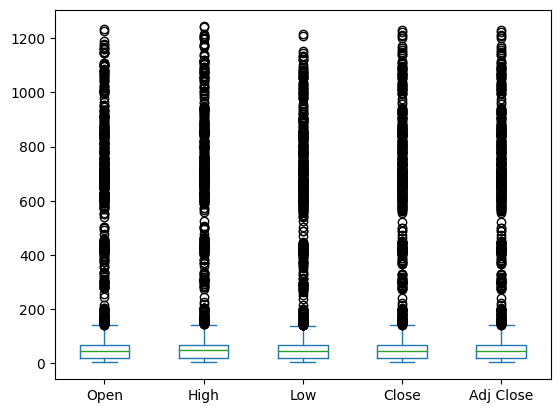

In [73]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [74]:
import plotly.graph_objects as go
import pandas as pd

# Create the Plotly figure
fig = go.Figure()

# Add the "Open and close" line trace
fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], mode='lines', name='Open', line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Low'], mode='lines', name='Close', line=dict(color='blue', width=1)))

# Update layout for interactivity
fig.update_layout(
title='Stock High and Low Prices of Tesla', xaxis_title='Date', yaxis_title='Price',hovermode='x', showlegend=True)
fig.show()


In [75]:
import plotly.graph_objects as go
import pandas as pd

# Create the Plotly figure
fig = go.Figure()

# Add the "Open and close" line trace
fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], mode='lines', name='Open', line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close', line=dict(color='blue', width=1)))

# Update layout for interactivity
fig.update_layout(
title='Stock Open and Close Prices of Tesla', xaxis_title='Date', yaxis_title='Price',hovermode='x', showlegend=True)
fig.show()


# Model Building [Fransisca Eva]



In [76]:
df = pd.read_csv("/content/gdrive/MyDrive/Dataset/TSLA.csv")

## Data Selection and Slicing

In [77]:
# "High" has been taken as the target variable
training_set = df.iloc[:, 2:3].values

In [78]:
print(training_set)

[[   5.      ]
 [   6.084   ]
 [   5.184   ]
 ...
 [ 997.859985]
 [1040.699951]
 [1024.48999 ]]


In [79]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

df['Date'] = df['Date'].astype(int)
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

ValueError: ignored

In [80]:
print(training_set_scaled)

NameError: ignored

In [81]:
# Creating a data structure with 60 timestamps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

NameError: ignored

In [82]:
print(X_train)
X_train.shape

[]


AttributeError: ignored

In [ ]:
print(y_train)
y_train.shape

In [55]:
# Reshaping to ensure that the input match the neural network architecture
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

AttributeError: ignored

## RNN model building

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [58]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

AttributeError: ignored

In [59]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [60]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [61]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

In [63]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

KeyError: ignored

### Making Prediction

In [ ]:
df_test = pd.read_csv("/content/gdrive/My Drive/ODL ASSIGNMENT TESLA/TSLA TEST.csv")
real_stock_price = df_test.iloc[:, 2:3].values
df_test.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
47,2022-03-11,840.200012,843.799988,793.770020,795.349976,795.349976,22272800
48,2022-03-14,780.609985,800.700012,756.039978,766.369995,766.369995,23717400
49,2022-03-15,775.270020,805.570007,756.570007,801.890015,801.890015,22280400
50,2022-03-16,809.000000,842.000000,802.260010,840.229980,840.229980,28009600
51,2022-03-17,830.989990,875.000000,825.719971,871.599976,871.599976,22194300
52,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
53,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
54,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
55,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
56,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


In [ ]:
print(real_stock_price)

[[1201.069946]
 [1208.      ]
 [1170.339966]
 [1088.      ]
 [1080.930054]
 [1059.099976]
 [1075.849976]
 [1114.839966]
 [1115.599976]
 [1052.      ]
 [1070.790039]
 [1054.670044]
 [1041.660034]
 [1004.549988]
 [ 933.51001 ]
 [ 951.26001 ]
 [ 987.690002]
 [ 935.390015]
 [ 857.5     ]
 [ 937.98999 ]
 [ 943.700012]
 [ 931.5     ]
 [ 937.      ]
 [ 936.5     ]
 [ 947.77002 ]
 [ 926.289978]
 [ 946.27002 ]
 [ 943.809998]
 [ 915.960022]
 [ 898.880005]
 [ 923.      ]
 [ 926.429993]
 [ 918.5     ]
 [ 886.869995]
 [ 856.72998 ]
 [ 835.299988]
 [ 802.47998 ]
 [ 819.5     ]
 [ 876.859985]
 [ 889.880005]
 [ 886.47998 ]
 [ 886.440002]
 [ 855.650024]
 [ 866.140015]
 [ 849.98999 ]
 [ 860.559998]
 [ 854.450012]
 [ 843.799988]
 [ 800.700012]
 [ 805.570007]
 [ 842.      ]
 [ 875.      ]
 [ 907.849976]
 [ 942.849976]
 [ 997.859985]
 [1040.699951]
 [1024.48999 ]]


In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((df['High'], df_test['High']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 117):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


2/2 [==============================] - 2s 33ms/step


In [ ]:
print(real_stock_price)

[[1201.069946]
 [1208.      ]
 [1170.339966]
 [1088.      ]
 [1080.930054]
 [1059.099976]
 [1075.849976]
 [1114.839966]
 [1115.599976]
 [1052.      ]
 [1070.790039]
 [1054.670044]
 [1041.660034]
 [1004.549988]
 [ 933.51001 ]
 [ 951.26001 ]
 [ 987.690002]
 [ 935.390015]
 [ 857.5     ]
 [ 937.98999 ]
 [ 943.700012]
 [ 931.5     ]
 [ 937.      ]
 [ 936.5     ]
 [ 947.77002 ]
 [ 926.289978]
 [ 946.27002 ]
 [ 943.809998]
 [ 915.960022]
 [ 898.880005]
 [ 923.      ]
 [ 926.429993]
 [ 918.5     ]
 [ 886.869995]
 [ 856.72998 ]
 [ 835.299988]
 [ 802.47998 ]
 [ 819.5     ]
 [ 876.859985]
 [ 889.880005]
 [ 886.47998 ]
 [ 886.440002]
 [ 855.650024]
 [ 866.140015]
 [ 849.98999 ]
 [ 860.559998]
 [ 854.450012]
 [ 843.799988]
 [ 800.700012]
 [ 805.570007]
 [ 842.      ]
 [ 875.      ]
 [ 907.849976]
 [ 942.849976]
 [ 997.859985]
 [1040.699951]
 [1024.48999 ]]


In [ ]:
print(predicted_stock_price)

[[1047.7792 ]
 [1115.4984 ]
 [1133.0978 ]
 [1091.319  ]
 [1065.301  ]
 [1045.3162 ]
 [1031.6862 ]
 [1021.7932 ]
 [1049.7946 ]
 [1048.9797 ]
 [1013.4296 ]
 [1024.9503 ]
 [1020.8207 ]
 [1001.78436]
 [ 980.6669 ]
 [ 930.58875]
 [ 928.2647 ]
 [ 947.7536 ]
 [ 907.8527 ]
 [ 853.78827]
 [ 900.1704 ]
 [ 905.9554 ]
 [ 892.8624 ]
 [ 901.4578 ]
 [ 904.0587 ]
 [ 912.54974]
 [ 897.8609 ]
 [ 910.8911 ]
 [ 909.91656]
 [ 888.0525 ]
 [ 873.3231 ]
 [ 886.8535 ]
 [ 887.4607 ]
 [ 880.35834]
 [ 858.59717]
 [ 834.77234]
 [ 813.97894]
 [ 784.12134]
 [ 786.168  ]
 [ 831.43207]
 [ 845.78326]
 [ 847.85376]
 [ 854.65625]
 [ 835.0952 ]
 [ 839.8228 ]
 [ 826.1158 ]
 [ 828.57715]
 [ 822.6146 ]
 [ 812.26086]
 [ 779.87646]
 [ 776.02893]
 [ 802.2995 ]
 [ 831.16064]
 [ 863.4617 ]
 [ 901.36084]
 [ 957.7345 ]
 [ 999.42645]]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
print("Mean Absolute Error: ", mean_absolute_error(predicted_stock_price, real_stock_price))
mse = mean_squared_error(predicted_stock_price, real_stock_price)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))
r2 = r2_score(real_stock_price, predicted_stock_price)
print("R-squared (R2) Score:", r2)

Mean Absolute Error:  39.91760043585527
Mean Squared Error:  2541.0449095870367
Root Mean Squared Error:  50.408778100515754
R-squared (R2) Score: 0.7486986931579034


In [ ]:
predicted_stock_price = predicted_stock_price.reshape(-1)
print(predicted_stock_price)
print()

real_stock_price = real_stock_price.reshape(-1)
print(real_stock_price)

[1047.7792  1115.4984  1133.0978  1091.319   1065.301   1045.3162
 1031.6862  1021.7932  1049.7946  1048.9797  1013.4296  1024.9503
 1020.8207  1001.78436  980.6669   930.58875  928.2647   947.7536
  907.8527   853.78827  900.1704   905.9554   892.8624   901.4578
  904.0587   912.54974  897.8609   910.8911   909.91656  888.0525
  873.3231   886.8535   887.4607   880.35834  858.59717  834.77234
  813.97894  784.12134  786.168    831.43207  845.78326  847.85376
  854.65625  835.0952   839.8228   826.1158   828.57715  822.6146
  812.26086  779.87646  776.02893  802.2995   831.16064  863.4617
  901.36084  957.7345   999.42645]

[1201.069946 1208.       1170.339966 1088.       1080.930054 1059.099976
 1075.849976 1114.839966 1115.599976 1052.       1070.790039 1054.670044
 1041.660034 1004.549988  933.51001   951.26001   987.690002  935.390015
  857.5       937.98999   943.700012  931.5       937.        936.5
  947.77002   926.289978  946.27002   943.809998  915.960022  898.880005
  923.  

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Create the Plotly figure
fig = go.Figure()

# Add the "Open and close" line trace
fig.add_trace(go.Scatter(x=df['Date'], y=predicted_stock_price, mode='lines', name='Predicted Price', line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x=df['Date'], y=real_stock_price, mode='lines', name='Real Stock Price', line=dict(color='blue', width=1)))

# Update layout for interactivity
fig.update_layout(
title='Stock High and Low Prices of Tesla', xaxis_title='Date', yaxis_title='Price',hovermode='x', showlegend=True)
fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you already have 'predicted_price' and 'y_test' (real stock price) arrays
# Replace 'predicted_price' and 'y_test' with your actual variable names

# Create the Plotly figure
fig = go.Figure()

# Add the "Predicted Price" and "Real Stock Price" line traces
fig.add_trace(go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predicted Price', line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real Stock Price', line=dict(color='blue', width=1)))

# Update layout for interactivity
fig.update_layout(
    title='Predicted and Real Stock Prices of Tesla',
    xaxis_title='Date',
    yaxis_title='Price',
    hovermode='x',
    showlegend=True
)

# Show the figure
fig.show()


#Model Building [Marcell Agung W]

In [ ]:
from google.colab import drive

#Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [34]:
import pandas as pd
import plotly.graph_objects as go
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas_datareader as web

In [35]:
#Raw datasets Marcell TP058650
df = pd.read_csv('/content/gdrive/MyDrive/Dataset/TSLA.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
5,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
6,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
7,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
8,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500
9,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500


In [36]:
df = df.set_index('Date')
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500


In [37]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2365

In [38]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.80767879],
       [0.81186057],
       [0.82393312]])

In [39]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([1.31893210e-03, 1.30915016e-03, 1.00427957e-03, 5.54310154e-04,
       5.05400434e-05, 0.00000000e+00, 2.70633781e-04, 2.60851837e-04,
       2.03790498e-04, 3.81495812e-04, 6.58650889e-04, 6.66802509e-04,
       7.89076807e-04, 9.96127953e-04, 7.33645792e-04, 7.20603200e-04,
       8.47768470e-04, 8.95047866e-04, 8.39616851e-04, 7.74403891e-04,
       8.02119399e-04, 7.41797412e-04, 6.74954128e-04, 8.34725879e-04,
       1.00264925e-03, 8.90156894e-04, 7.58100651e-04, 6.17892789e-04,
       6.19523113e-04, 5.26594646e-04, 3.42368036e-04, 2.93458317e-04,
       4.10841643e-04, 4.85836547e-04, 5.46158534e-04, 4.84206223e-04,
       4.87466871e-04, 5.38006914e-04, 7.05930284e-04, 5.54310154e-04,
       6.68432833e-04, 6.43977973e-04, 6.35826353e-04, 6.63541861e-04,
       5.99959225e-04, 7.58100651e-04, 8.57550414e-04, 8.55920090e-04,
       7.72773567e-04, 8.31465231e-04, 8.00489075e-04, 7.12451580e-04,
       8.02119399e-04, 8.67332358e-04, 1.00754022e-03, 8.37986527e-04,
     

In [40]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2305, 60, 1)

In [41]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()

# Add a 1D Convolutional layer with 64 filters and kernel size of 3
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))

# Add a MaxPooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output from Convolutional layers
model.add(Flatten())

# Add a Dense layer with 25 neurons
model.add(Dense(25, activation='relu'))

# Add the output Dense layer with 1 neuron (for regression)
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2305/2305 [==============================] - 7s 3ms/step - loss: 1.9467e-05


In [42]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range (60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rsme = np.sqrt(np.mean(predictions - y_test) ** 2)
rsme

19/19 [==============================] - 0s 2ms/step


14.020660744758615

In [43]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 40.636914067716596


In [44]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 3510.1823787515996


In [45]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 59.24679213891331


In [46]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.9649425535604916


In [47]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-47-8f78faa8f9ca>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
last_60_days = data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print ('Predicting the closing price for the next day')
print()
print(pred_price)

1/1 [==============================] - 0s 26ms/step
Predicting the closing price for the next day

[[909.84875]]


In [49]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you already have 'predicted_price' and 'y_test' (real stock price) arrays
# Replace 'predicted_price' and 'y_test' with your actual variable names

# Create the Plotly figure
fig = go.Figure()

# Add the "Predicted Price" and "Real Stock Price" line traces
fig.add_trace(go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predicted Price', line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real Stock Price', line=dict(color='blue', width=1)))

# Update layout for interactivity
fig.update_layout(
    title='Predicted and Real Stock Prices of Tesla',
    xaxis_title='Date',
    yaxis_title='Price',
    hovermode='x',
    showlegend=True
)

# Show the figure
fig.show()


#Model Building [Celine Taydey]

In [ ]:
from google.colab import drive

#Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
import pandas as pd
import plotly.graph_objects as go
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas_datareader as web

In [19]:
#Raw datasets Celine Taydey
df = pd.read_csv("/content/gdrive/MyDrive/Dataset/TSLA.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
5,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
6,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
7,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
8,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500
9,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500


In [20]:
df = df.set_index('Date')
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500


In [21]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2365

In [22]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.80767879],
       [0.81186057],
       [0.82393312]])

In [23]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([1.31893210e-03, 1.30915016e-03, 1.00427957e-03, 5.54310154e-04,
       5.05400434e-05, 0.00000000e+00, 2.70633781e-04, 2.60851837e-04,
       2.03790498e-04, 3.81495812e-04, 6.58650889e-04, 6.66802509e-04,
       7.89076807e-04, 9.96127953e-04, 7.33645792e-04, 7.20603200e-04,
       8.47768470e-04, 8.95047866e-04, 8.39616851e-04, 7.74403891e-04,
       8.02119399e-04, 7.41797412e-04, 6.74954128e-04, 8.34725879e-04,
       1.00264925e-03, 8.90156894e-04, 7.58100651e-04, 6.17892789e-04,
       6.19523113e-04, 5.26594646e-04, 3.42368036e-04, 2.93458317e-04,
       4.10841643e-04, 4.85836547e-04, 5.46158534e-04, 4.84206223e-04,
       4.87466871e-04, 5.38006914e-04, 7.05930284e-04, 5.54310154e-04,
       6.68432833e-04, 6.43977973e-04, 6.35826353e-04, 6.63541861e-04,
       5.99959225e-04, 7.58100651e-04, 8.57550414e-04, 8.55920090e-04,
       7.72773567e-04, 8.31465231e-04, 8.00489075e-04, 7.12451580e-04,
       8.02119399e-04, 8.67332358e-04, 1.00754022e-03, 8.37986527e-04,
     

In [24]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2305, 60, 1)

In [25]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# Add the input Dense layer with 50 neurons and ReLU activation
model.add(Dense(50, activation='relu', input_shape=(x_train.shape[1],)))

# Add the hidden Dense layer with 25 neurons and ReLU activation
model.add(Dense(25, activation='relu'))

# Add the output Dense layer with 1 neuron (for regression)
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)


2305/2305 [==============================] - 4s 2ms/step - loss: 1.4888e-05


In [26]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range (60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rsme = np.sqrt(np.mean(predictions - y_test) ** 2)
rsme

19/19 [==============================] - 0s 3ms/step


47.35609311233278

In [27]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 52.27366216808607


In [28]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 5117.430903611057


In [29]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 71.53622092067107


In [30]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.9488903878906044


In [31]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-31-8f78faa8f9ca>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
last_60_days = data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print ('Predicting the closing price for the next day')
print()
print(pred_price)

1/1 [==============================] - 0s 37ms/step
Predicting the closing price for the next day

[[857.1958]]


In [33]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you already have 'predicted_price' and 'y_test' (real stock price) arrays
# Replace 'predicted_price' and 'y_test' with your actual variable names

# Create the Plotly figure
fig = go.Figure()

# Add the "Predicted Price" and "Real Stock Price" line traces
fig.add_trace(go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predicted Price', line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real Stock Price', line=dict(color='blue', width=1)))

# Update layout for interactivity
fig.update_layout(
    title='Predicted and Real Stock Prices of Tesla',
    xaxis_title='Date',
    yaxis_title='Price',
    hovermode='x',
    showlegend=True
)

# Show the figure
fig.show()


#Model Building [Gavin Owen Susanto]

In [1]:
from google.colab import drive

#Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import plotly.graph_objects as go
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas_datareader as web

In [3]:
#Raw datasets Fransisca Eva TP058983
df = pd.read_csv("/content/gdrive/MyDrive/Dataset/TSLA.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
5,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
6,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
7,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
8,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500
9,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500


In [4]:
df = df.set_index('Date')
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500


In [5]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2365

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.80767879],
       [0.81186057],
       [0.82393312]])

In [7]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([1.31893210e-03, 1.30915016e-03, 1.00427957e-03, 5.54310154e-04,
       5.05400434e-05, 0.00000000e+00, 2.70633781e-04, 2.60851837e-04,
       2.03790498e-04, 3.81495812e-04, 6.58650889e-04, 6.66802509e-04,
       7.89076807e-04, 9.96127953e-04, 7.33645792e-04, 7.20603200e-04,
       8.47768470e-04, 8.95047866e-04, 8.39616851e-04, 7.74403891e-04,
       8.02119399e-04, 7.41797412e-04, 6.74954128e-04, 8.34725879e-04,
       1.00264925e-03, 8.90156894e-04, 7.58100651e-04, 6.17892789e-04,
       6.19523113e-04, 5.26594646e-04, 3.42368036e-04, 2.93458317e-04,
       4.10841643e-04, 4.85836547e-04, 5.46158534e-04, 4.84206223e-04,
       4.87466871e-04, 5.38006914e-04, 7.05930284e-04, 5.54310154e-04,
       6.68432833e-04, 6.43977973e-04, 6.35826353e-04, 6.63541861e-04,
       5.99959225e-04, 7.58100651e-04, 8.57550414e-04, 8.55920090e-04,
       7.72773567e-04, 8.31465231e-04, 8.00489075e-04, 7.12451580e-04,
       8.02119399e-04, 8.67332358e-04, 1.00754022e-03, 8.37986527e-04,
     

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2305, 60, 1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))  # Output layer, no activation for regression
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2305/2305 [==============================] - 12s 5ms/step - loss: 1.9370e-05


In [10]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range (60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rsme = np.sqrt(np.mean(predictions - y_test) ** 2)
rsme

19/19 [==============================] - 0s 3ms/step


149.53361998329268

In [11]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 150.0152461299555


In [12]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 33794.88164991414


In [13]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 183.83384250434995


In [14]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.6624784340143741


In [15]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-15-8f78faa8f9ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [16]:
last_60_days = data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print ('Predicting the closing price for the next day')
print()
print(pred_price)

1/1 [==============================] - 0s 32ms/step
Predicting the closing price for the next day

[[679.0059]]


In [17]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you already have 'predicted_price' and 'y_test' (real stock price) arrays
# Replace 'predicted_price' and 'y_test' with your actual variable names

# Create the Plotly figure
fig = go.Figure()

# Add the "Predicted Price" and "Real Stock Price" line traces
fig.add_trace(go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predicted Price', line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real Stock Price', line=dict(color='blue', width=1)))

# Update layout for interactivity
fig.update_layout(
    title='Predicted and Real Stock Prices of Tesla',
    xaxis_title='Date',
    yaxis_title='Price',
    hovermode='x',
    showlegend=True
)

# Show the figure
fig.show()